<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1Î≤à

Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÏßëÍ≥º Í¥ÄÎ†®Îêú Ïó¨Îü¨ ÏàòÏπòÎì§Í≥º ÏßëÏùò Í∞ÄÍ≤©, log1p Ï†ïÍ∑úÌôîÎêú price Ïª¨Îüº ÏòàÏ∏° ÌïòÍ∏∞ </br>
Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv ÏùºÎ∂Ä Ï†ÑÏ≤òÎ¶¨
data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem1.csv

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [274]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem1.csv')
df.head()

Id  LotArea  LotFrontage  YearBuilt  1stFlrSF  2ndFlrSF  YearRemodAdd  \
0   1     8450         65.0       2003       856       854          2003   
1   2     9600         80.0       1976      1262         0          1976   
2   3    11250         68.0       2001       920       866          2002   
3   4     9550         60.0       1915       961       756          1970   
4   5    14260         84.0       2000      1145      1053          2000   

   TotRmsAbvGrd  KitchenAbvGr  BedroomAbvGr  GarageCars  GarageArea      price  
0             8             1             3           2         548  12.247699  
1             6             1             3           2         460  12.109016  
2             6             1             3           2         608  12.317171  
3             7             1             3           3         642  11.849405  
4             9             1             4           3         836  12.429220

1.1 Îç∞Ïù¥ÌÑ∞ EDA ÏàòÌñâ ÌõÑ, Î∂ÑÏÑùÍ∞Ä ÏûÖÏû•ÏóêÏÑú ÏùòÎØ∏ÏûàÎäî ÌÉêÏÉâ

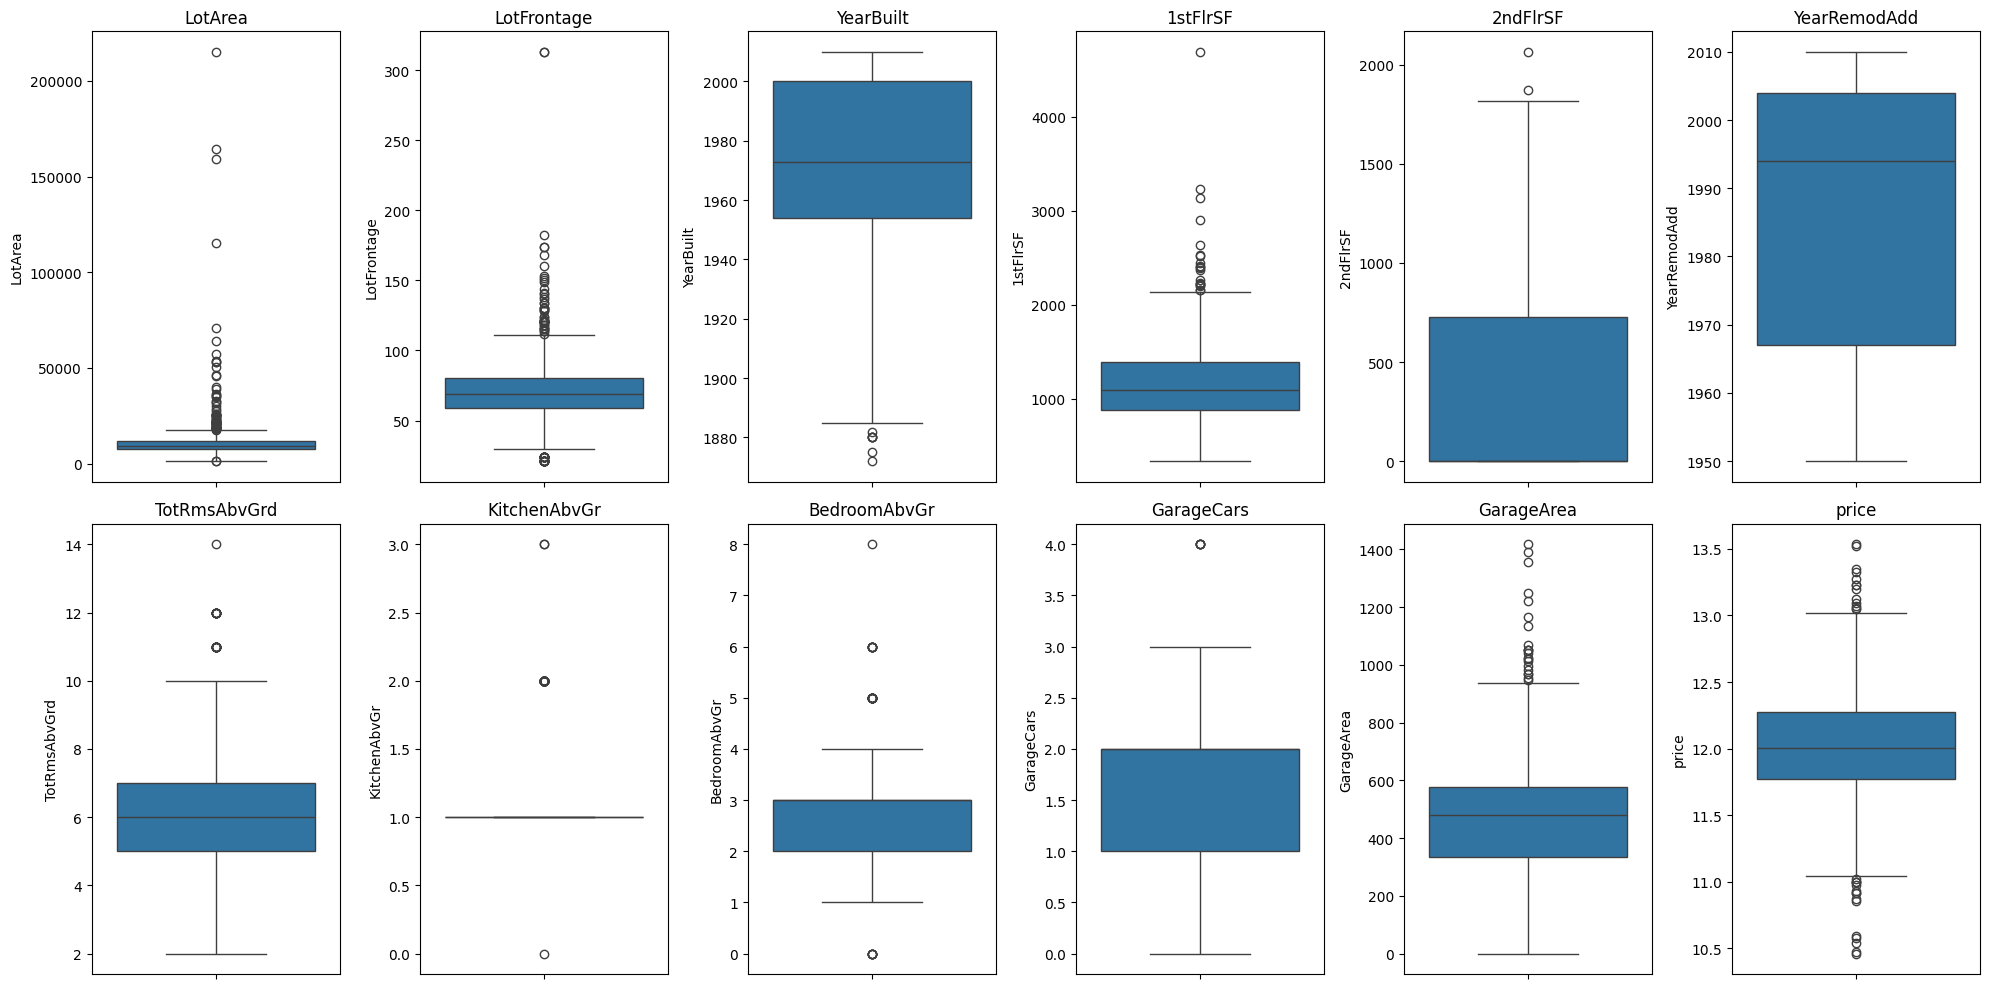

LotArea  LotFrontage    YearBuilt     1stFlrSF     2ndFlrSF  \
count    1460.000000  1201.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082    70.049958  1971.267808  1162.626712   346.992466   
std      9981.264932    24.284752    30.202904   386.587738   436.528436   
min      1300.000000    21.000000  1872.000000   334.000000     0.000000   
25%      7553.500000    59.000000  1954.000000   882.000000     0.000000   
50%      9478.500000    69.000000  1973.000000  1087.000000     0.000000   
75%     11601.500000    80.000000  2000.000000  1391.250000   728.000000   
max    215245.000000   313.000000  2010.000000  4692.000000  2065.000000   

       YearRemodAdd  TotRmsAbvGrd  KitchenAbvGr  BedroomAbvGr   GarageCars  \
count   1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean    1984.865753      6.517808      1.046575      2.866438     1.767123   
std       20.645407      1.625393      0.220338      0.815778     0.747315   
min     1950.000000      2.000000      0.000000      0.000000     0.000000   
25%     1967.000000      5.000000      1.000000      2.000000     1.000000   
50%     1994.000000      6.000000      1.000000      3.000000     2.000000   
75%     2004.000000      7.000000      1.000000      3.000000     2.000000   
max     2010.000000     14.000000      3.000000      8.000000     4.000000   

        GarageArea        price  
count  1460.000000  1460.000000  
mean    472.980137    12.024057  
std     213.804841     0.399449  
min       0.000000    10.460271  
25%     334.500000    11.775105  
50%     480.000000    12.001512  
75%     576.000000    12.273736  
max    1418.000000    13.534474


Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ÎèÑÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Î∂ÑÏÑùÌïú Í≤∞Í≥º
LotArea, LotFrontage, 2dnFlrSF Îì±Ïùò Î∂ÑÌè¨Í∞Ä Ìïú Ï™ΩÏúºÎ°ú Ïè†Î†§ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏñ¥, Ïù¥ÏÉÅÏπò ÌôïÏù∏ÏùÑ Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏñ¥Î≥¥Ïù∏Îã§. 
1stFlrSF	2ndFlrSFÏùò Í≤ΩÏö∞ max Í∞íÍ≥º 75%Ïùò Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÌôïÏã§Ìûà Î≥¥Ïó¨ÏßÄÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥ÏïºÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. 
Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÎòêÎäî Ï∞®ÌõÑ Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÍ∑úÏÑ±ÏùÑ ÌôïÎ≥¥Ìï¥ÏïºÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.




In [275]:
# 1) Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
df2 = df.drop(columns = ['Id'],axis = 1)

cols = df2.columns.tolist()

fig, axes = plt.subplots(2,6, figsize = (20, 10))

for i, axes in enumerate(axes.flat[:len(cols)]):
  col_i = cols[i]
  sns.boxplot(df2[col_i], ax = axes)
  axes.set_title(col_i)


plt.tight_layout()
plt.show()

display(df2.describe())
print("""
Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ÎèÑÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Î∂ÑÏÑùÌïú Í≤∞Í≥º
LotArea, LotFrontage, 2dnFlrSF Îì±Ïùò Î∂ÑÌè¨Í∞Ä Ìïú Ï™ΩÏúºÎ°ú Ïè†Î†§ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏñ¥, Ïù¥ÏÉÅÏπò ÌôïÏù∏ÏùÑ Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏñ¥Î≥¥Ïù∏Îã§.
1stFlrSF	2ndFlrSFÏùò Í≤ΩÏö∞ max Í∞íÍ≥º 75%Ïùò Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÌôïÏã§Ìûà Î≥¥Ïó¨ÏßÄÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥ÏïºÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÎòêÎäî Ï∞®ÌõÑ Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÍ∑úÏÑ±ÏùÑ ÌôïÎ≥¥Ìï¥ÏïºÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

""")

In [276]:
# 2) Í≤∞Ï∏°Ïπò ÌôïÏù∏
display(df2.isnull().sum() / len(df2))
print("""
Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®Ïóê Îî∞Îùº Îã§ÏùåÏóê Îî∞Îùº Ï≤òÎ¶¨ÌïúÎã§.
- 10% ÎØ∏Îßå : ÏÇ≠Ï†úÌïòÍ±∞ÎÇò Îã§Î•∏ Í∞íÏúºÎ°ú ÏπòÏôÑ, ÌèâÍ∑†, Ï§ëÏïñÍ∞í, ÏµúÎπàÍ∞í / KNN ÌöåÍ∑Ä Î™®Îç∏ Îì±ÏùÑ ÌÜµÌï¥ Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ
- 10 ~ 50% : Ï§ëÍ∞Ñ ÏàòÏ§Ä Í≤∞Ï∏°ÏπòÎ°ú, ÌèâÍ∑†, Ï§ëÏïôÍ∞í, ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ / Îã§Ï§ë ÎåÄÏ≤¥Î≤ï, ÌöåÍ∑Ä ÎåÄÏ≤¥Î≤ï ÏÇ¨Ïö©
- 50 % Ïù¥ÏÉÅ : Î≥ÄÏàò ÏÇ≠Ï†ú

LotFrontageÏùò Í≤∞Ï∏°ÏùÄ 10%Í∞Ä Ï°∞Í∏à ÎÑòÏùåÏúºÎ°ú ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º ÎåÄÏ≤¥ÌïòÎèÑÎ°ùÌïúÎã§.
""")

# ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï∏° ÎåÄÏ≤¥Ìïú Îç∞Ïù¥ÌÑ∞Î•º df3ÏúºÎ°ú ÏßÄÏ†ï
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
df3 = df2.copy()

LotArea         0.000000
LotFrontage     0.177397
YearBuilt       0.000000
1stFlrSF        0.000000
2ndFlrSF        0.000000
YearRemodAdd    0.000000
TotRmsAbvGrd    0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
GarageCars      0.000000
GarageArea      0.000000
price           0.000000
dtype: float64


Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®Ïóê Îî∞Îùº Îã§ÏùåÏóê Îî∞Îùº Ï≤òÎ¶¨ÌïúÎã§.
- 10% ÎØ∏Îßå : ÏÇ≠Ï†úÌïòÍ±∞ÎÇò Îã§Î•∏ Í∞íÏúºÎ°ú ÏπòÏôÑ, ÌèâÍ∑†, Ï§ëÏïñÍ∞í, ÏµúÎπàÍ∞í / KNN ÌöåÍ∑Ä Î™®Îç∏ Îì±ÏùÑ ÌÜµÌï¥ Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ
- 10 ~ 50% : Ï§ëÍ∞Ñ ÏàòÏ§Ä Í≤∞Ï∏°ÏπòÎ°ú, ÌèâÍ∑†, Ï§ëÏïôÍ∞í, ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ / Îã§Ï§ë ÎåÄÏ≤¥Î≤ï, ÌöåÍ∑Ä ÎåÄÏ≤¥Î≤ï ÏÇ¨Ïö©
- 50 % Ïù¥ÏÉÅ : Î≥ÄÏàò ÏÇ≠Ï†ú 

LotFrontageÏùò Í≤∞Ï∏°ÏùÄ 10%Í∞Ä Ï°∞Í∏à ÎÑòÏùåÏúºÎ°ú ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º ÎåÄÏ≤¥ÌïòÎèÑÎ°ùÌïúÎã§.



Train,Valid,Test setÏúºÎ°ú Î∂ÑÌï† Î∞è ÏãúÍ∞ÅÌôî Ï†úÏãú

In [277]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1) Scaling ÏùÑ ÌÜµÌïú Îã®ÏúÑÎ≥ÄÌôò
s_df = df3.copy()
s_X = df2.drop(columns =['price'], axis = 1)
s_y = df2['price']

ss_X = pd.DataFrame(StandardScaler().fit_transform(s_X), columns = s_X.columns)

X_train, X_test, y_train, y_test= train_test_split(ss_X, s_y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(r2_score(y_test, lr_pred))
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

0.8095151461262806
0.18853797201787215


In [278]:
# 2) Scaling ÌïòÏßÄ ÏïäÏïòÏùÑÎïå
s_df = df3.copy()
s_X = df2.drop(columns =['price'], axis = 1)
s_y = df2['price']

X_train, X_test, y_train, y_test= train_test_split(s_X, s_y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(r2_score(y_test, lr_pred))
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

0.8095151461262816
0.1885379720178716


In [279]:
# 3) ÍµêÏ∞® Í≤ÄÏ¶ùÏóê ÎåÄÌïú Í≤∞Í≥º
# Î™©Ï†Å) Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îßå Ï†ÅÌï©(FIT)ÎêòÍ≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥ÏßÄÎäî Í≥ºÏ†ÅÌï© Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÏù¥Îã§.
# ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÑÌï†Ïù¥ Ïó¨Îü¨Î≤à Î∞òÎ≥µÎêòÏñ¥ÏßêÏúºÎ°ú, ÏÉòÌîåÎßÅ Ìé∏Ìñ•ÏùÑ Î∞©ÏßÄ Ìï† Ïàò ÏûàÎã§.

cv = cross_val_score(lr ,ss_X, s_y, cv = 10, scoring= 'r2')
np.mean(cv)

0.7714860260216791

1-4. Î™®ÌòïÏóê Ï†ÅÌï©Ìïú Í∏∞Í≥ÑÌïôÏäµ Î™®Îç∏ 3Í∞ÄÏßÄ Íµ¨ÌòÑ

In [280]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

s_df = df3.copy()
s_X = df2.drop(columns =['price'], axis = 1)
s_y = df2['price']

ss_X = pd.DataFrame(StandardScaler().fit_transform(s_X), columns = s_X.columns)

X_train, X_test, y_train, y_test= train_test_split(ss_X, s_y, test_size = 0.2, random_state = 42)


models = {
    'rf' : RandomForestRegressor(random_state = 42) ,
    'ridge' : Ridge(),
    'svr' : SVR()

}
# 2) K-Fold
kfold = KFold(n_splits = 5, shuffle= True, random_state = 42)


result = []
for name, model in models.items():
  # cross_val_score
  cv = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'r2')
  mean_acuuracy = cv.mean()

  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  r2 = r2_score(y_test, pred)
  MSE = np.sqrt(mean_squared_error(y_test, pred))
  result.append([name, r2, MSE, mean_acuuracy])

pd.DataFrame(result, columns = ['Modle', 'r2_score', 'MSE','mean_acuuracy'])

Modle  r2_score       MSE  mean_acuuracy
0     rf  0.821134  0.182697       0.796941
1  ridge  0.809405  0.188592       0.765419
2    svr  0.844027  0.170606       0.810403

2Î≤à
Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÏΩîÎ°úÎÇò19Ïóê ÎåÄÌïú ÎÇòÎùºÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÎßÅ ÏßÑÌñâ </br>
Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : https://www.kaggle.com/imdevskp/corona-virus-report ÏùºÎ∂Ä ÌõÑÏ≤òÎ¶¨ </br>
data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv

In [281]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df = df.fillna(0)

# Ïã†Í∑ú ÌôïÏßÑÏûê,
for location in df.location.unique():
    lo = df[df.location == location]
    df.loc[lo.index,'new_cases'] =lo.total_cases.diff().values
    df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]

    df.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
    df.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]

    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

df.head()


location        date  total_cases  total_deaths  new_tests  population  \
0  Afghanistan  2020-02-24          5.0           0.0        0.0  39835428.0   
1  Afghanistan  2020-02-25          5.0           0.0        0.0  39835428.0   
2  Afghanistan  2020-02-26          5.0           0.0        0.0  39835428.0   
3  Afghanistan  2020-02-27          5.0           0.0        0.0  39835428.0   
4  Afghanistan  2020-02-28          5.0           0.0        0.0  39835428.0   

   new_vaccinations  new_cases  new_deaths  total_vacciantions  7days_new_case  
0               0.0        5.0         0.0                 0.0             0.0  
1               0.0        0.0         0.0                 0.0             0.0  
2               0.0        0.0         0.0                 0.0             0.0  
3               0.0        0.0         0.0                 0.0             0.0  
4               0.0        0.0         0.0                 0.0             0.0

ÎßàÏßÄÎßâ ÏùºÏûêÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïù∏Íµ¨ ÎåÄÎπÑ ÌôïÏßÑÏûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÎ•º Íµ¨ÌïòÏó¨Îùº
ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÎ≥ÑÎ°ú ÎàÑÏ†Å ÌôïÏßÑÏûê, ÏùºÏùº ÌôïÏßÑÏûê, ÎàÑÏ†Å ÏÇ¨ÎßùÏûê, ÏùºÏùº ÏÇ¨ÎßùÏûê, Í∑∏ÎûòÌîÑ, Î≤îÎ°ÄÎ•º Ïù¥Ïö©Ìï¥ÏÑú Í∞ÄÎèÖÏÑ± ÏûàÍ≤å ÎßåÎì§Ïñ¥Îùº

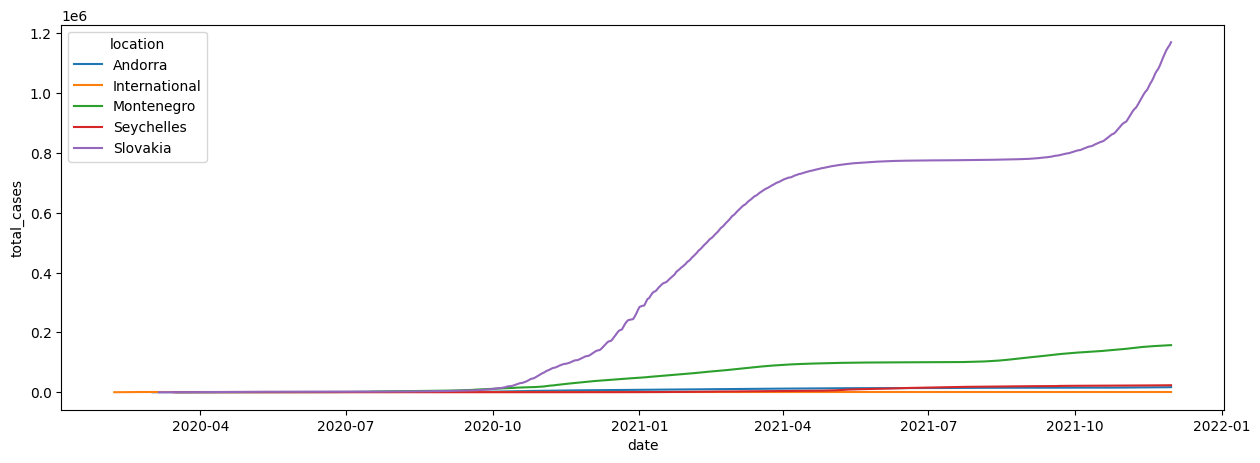

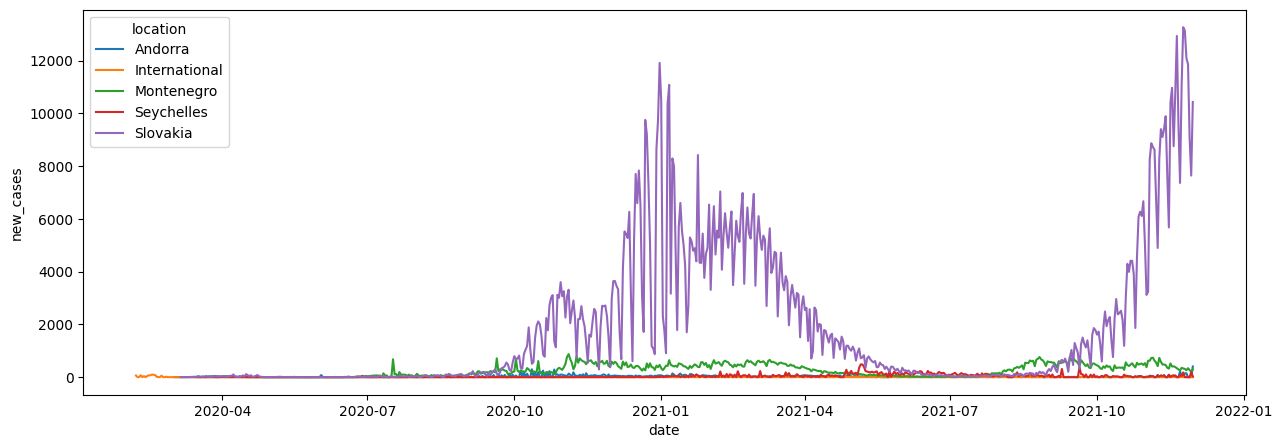

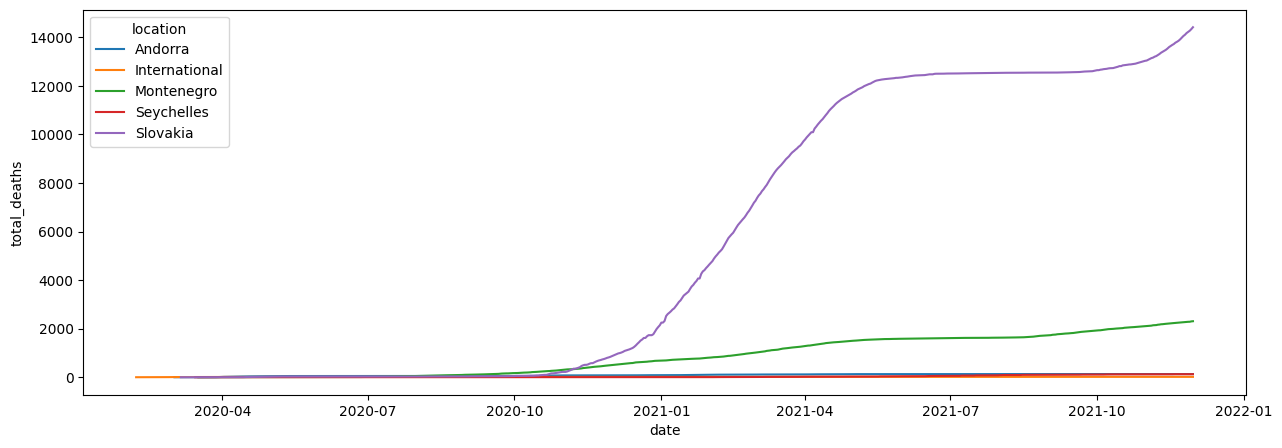

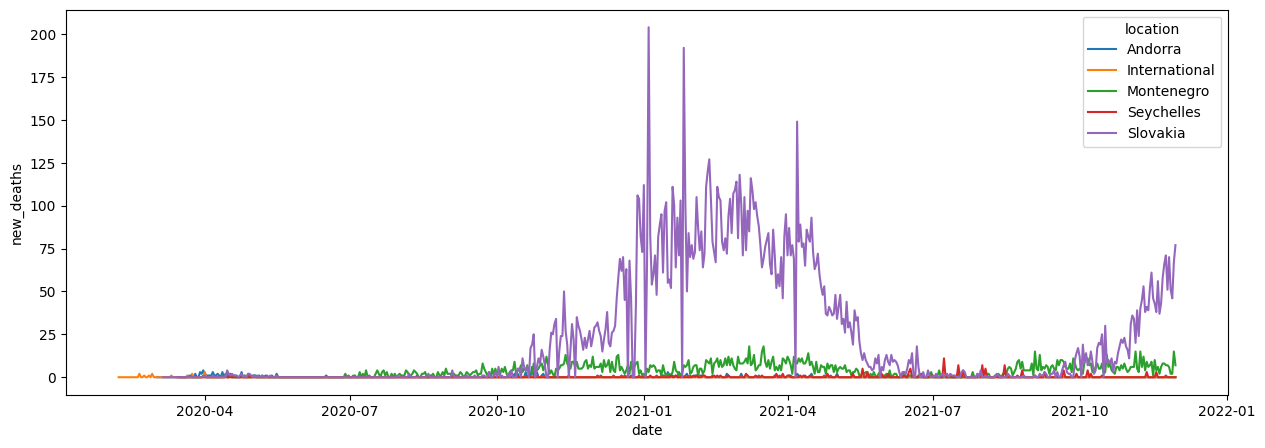

In [282]:

# ÌôïÏßÑÏûê ÎπÑÏú® Íµ¨ÌïòÍ∏∞
df['ratio'] = df['total_cases'] / df['population']

df['date'] = pd.to_datetime(df['date'])
max_date = df['date'].max()

last_df = df.loc[df['date'] == max_date].reset_index(drop = True)
top5_countries = last_df.groupby(['location']).agg({'ratio':'max'}).sort_values('ratio', ascending = False).head(5)
# ÎÇòÎùº Ï∂îÏ∂ú
top5 = list(top5_countries.index)


top5_df = df[df['location'].isin(top5)].reset_index(drop = True)
top5_df

# ÎàÑÏ†Å ÌôïÏßÑÏûê, ÏùºÏùº ÌôïÏßÑÏûê, ÎàÑÏ†Å ÏÇ¨ÎßùÏûê, ÏùºÏùº ÏÇ¨ÎßùÏûê,

for v in  ["total_cases", "new_cases", "total_deaths", "new_deaths"]:
  plt.figure(figsize = (15,5))
  sns.lineplot(data = top5_df, x = top5_df['date'],y = top5_df[v], hue = top5_df['location'])

ÏΩîÎ°úÎÇò ÏúÑÌóòÏßÄÏàòÎ•º ÏßÅÏ†ë ÎßåÎì§Í≥† Í∑∏ ÏúÑÌóòÏßÄÏàòÏóê ÎåÄÌïú ÏÑ§Î™ÖÏùÑ Ï†ÅÍ≥† ÏúÑÌóòÏßÄÏàòÍ∞Ä ÎÜíÏùÄ Íµ≠Í∞ÄÎì§ 10Í∞úÎ•º ÏÑ†Ï†ïÌï¥ÏÑú ÏãúÍ∞ÅÌôî

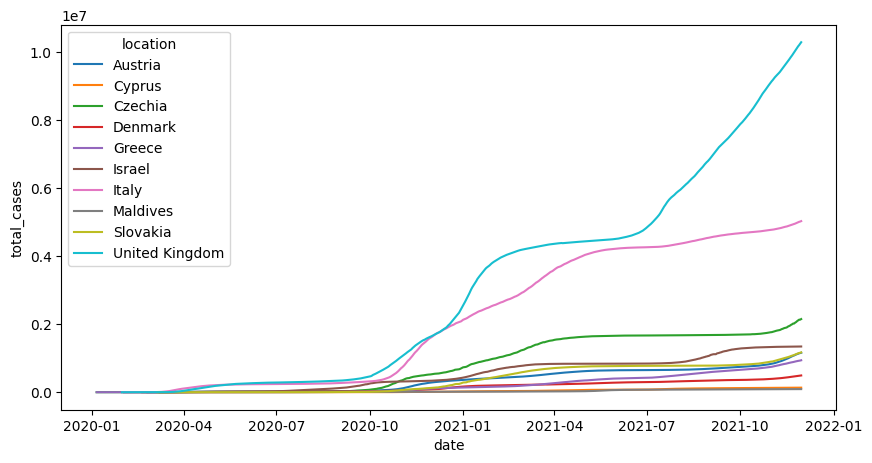

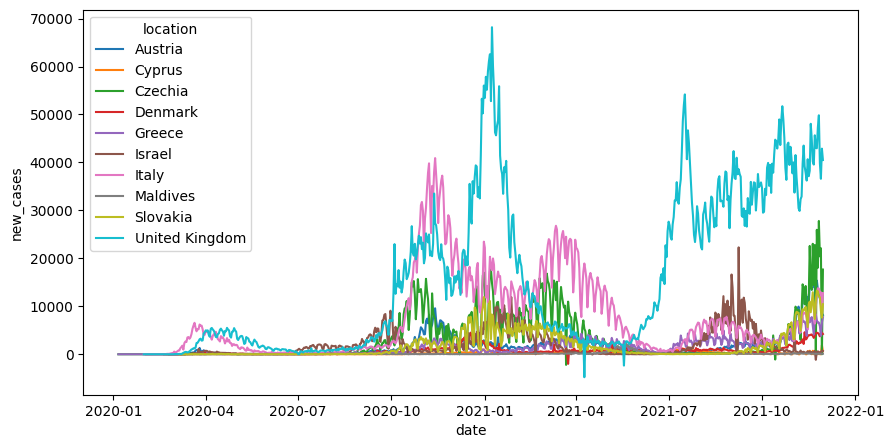

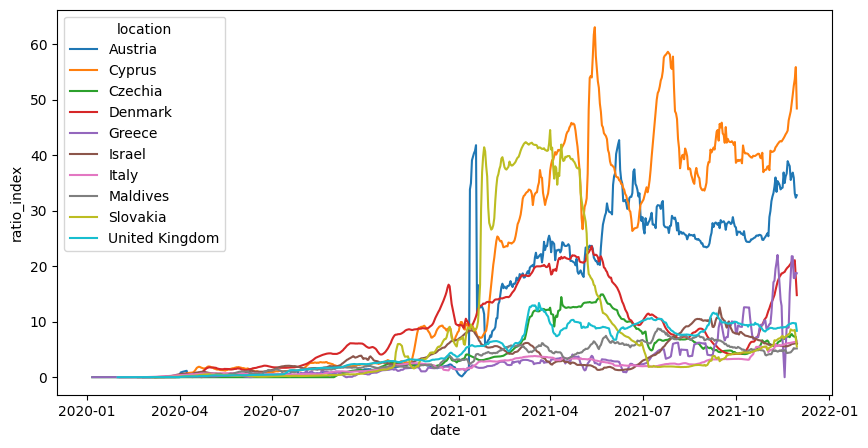

In [283]:
# ÏúÑÌóò ÏßÄÏàò ( ÏµúÍ∑ºÏùºÏ£ºÏùº ÎàÑÏ†Å ÌôïÏßÑÏûê / Ïù∏Íµ¨Ïàò)   + (ÏùºÏùº ÏÇ¨ÎßùÏûê / Ïù∏Íµ¨Ïàò) - (ÎàÑÏ†Å Î∞±Ïã† Ïù∏Íµ¨ / Ïù∏Íµ¨Ïàò) * Î≥¥Ï†ï ÏÉÅÏàò) * Î≥¥Ï†ï ÏÉÅÏàò

df['ratio_index'] = (df['7days_new_case'] / df['population'] + df['new_deaths'] / df['population'] - df['total_cases'] / df['population'] *0.001) * 100

# tailÎ•º Ïì∞Î©¥ group by Ïùò 1Î≤àÏß∏ Í≤ÉÎì§Îßå Ï∂îÏ∂úÎêòÏÑú ÎÇòÏò¥
index_top_10 = df.groupby(['location']).tail(1).sort_values('ratio_index', ascending = False).location.head(10).values


target = df[df['location'].isin(index_top_10)].reset_index(drop = True)
target

for v in ['total_cases','new_cases','ratio_index'] :
  plt.figure(figsize = (10,5))
  sns.lineplot(data = target, x = 'date', y = target[v], hue = 'location')
  plt.show()

ÌïúÍµ≠Ïùò ÏΩîÎ°úÎÇò Ïã†Í∑ú ÌôïÏßÑÏûê ÏòàÏ∏°Ìï¥Îùº(ÏÑ†Ìòï ÏãúÍ≥ÑÏó¥Î™®Îç∏ + ÎπÑÏÑ†ÌòïÏãúÍ≥ÑÏó¥ Í∞ÅÍ∞Å ÌïúÍ∞úÏî© ÎßåÎì§Ïñ¥Îùº)

                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  680
Model:                     AutoReg(7)   Log Likelihood               -4335.471
Method:               Conditional MLE   S.D. of innovations            151.877
Date:                Sun, 02 Mar 2025   AIC                           8688.943
Time:                        10:36:18   BIC                           8729.549
Sample:                             7   HQIC                          8704.668
                                  680                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.1530      7.799     -1.045      0.296     -23.439       7.133
new_cases.L1     0.7672      0.042     18.422      0.000       0.686       0.849
new_cases.L2    -0.2744      0.053     -5.16

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                  680
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4441.324
Date:                Sun, 02 Mar 2025   AIC                           8894.647
Time:                        10:36:19   BIC                           8921.771
Sample:                             0   HQIC                          8905.147
                                - 680                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5061      0.050    -10.153      0.000      -0.604      -0.408
ar.L2          0.1047      0.057      1.838      0.066      -0.007       0.216
ar.L3         -0.3273      0.035     -9.352      0.0

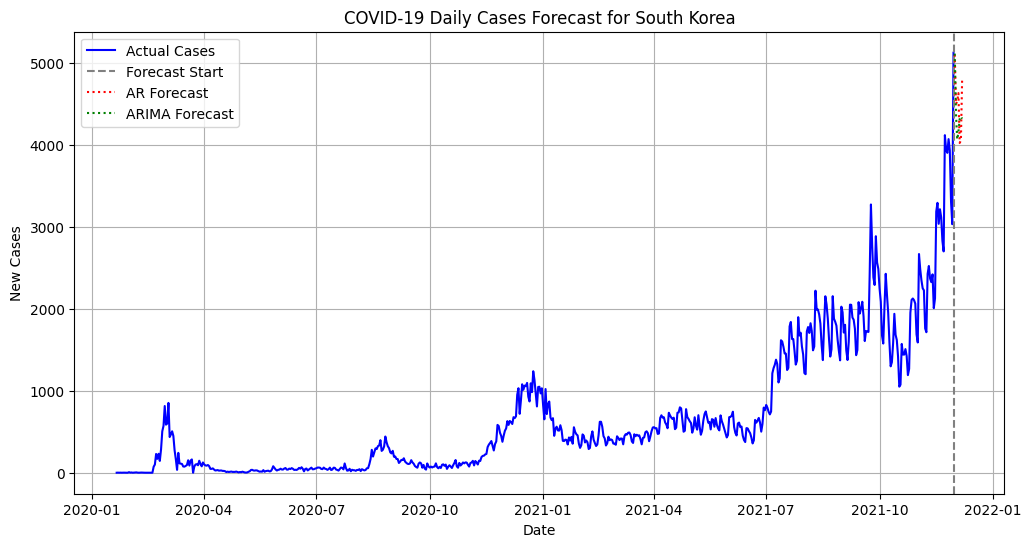

In [284]:
korea = df.loc[df['location']== 'South Korea'].reset_index(drop = True)

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

ar_model = AutoReg(korea["new_cases"], lags=7)  # ÏµúÍ∑º 7Ïùº Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°
ar_res = ar_model.fit()
print(ar_res.summary())

# ‚úÖ 3. AutoReg ÏòàÏ∏° (7Ïùº)
ar_forecast = ar_res.predict(start=len(korea), end=len(korea) + 6)

# ‚úÖ 4. ÎπÑÏÑ†Ìòï Î™®Îç∏ - ARIMA
arima_model = ARIMA(korea["new_cases"], order=(3,1,2))  # ÏµúÏ†Å order ÌäúÎãù (p,d,q)
arima_res = arima_model.fit()
print(arima_res.summary())

# ‚úÖ 5. ARIMA ÏòàÏ∏° (7Ïùº)
arima_forecast = arima_res.forecast(steps=7)

# ‚úÖ 6. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(korea["date"], korea["new_cases"], label="Actual Cases", color="blue")
plt.axvline(korea["date"].iloc[-1], color='gray', linestyle="--", label="Forecast Start")
plt.plot(pd.date_range(start=korea["date"].iloc[-1], periods=8, freq="D")[1:], ar_forecast, label="AR Forecast", linestyle="dotted", color="red")
plt.plot(pd.date_range(start=korea["date"].iloc[-1], periods=8, freq="D")[1:], arima_forecast, label="ARIMA Forecast", linestyle="dotted", color="green")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Daily Cases Forecast for South Korea")
plt.legend()
plt.grid()
plt.show()

Ïó≠Î¨∏Ìï≠ÏùÑ Î≥ÄÌôò Ìïú ÌõÑ Í∞Å Í∑∏Î£π(A~D)Ïùò ÏòÅÏó≠(Q1~Q5)Î≥Ñ ÏùëÎãµÏùò ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏôúÎèÑ, Ï≤®ÎèÑÎ•º Íµ¨ÌïòÎùº. (Í∞Å ÌÜµÍ≥ÑÎüâ Î≥ÑÎ°ú 4x5 dataframe ÏÉùÏÑ±)

In [338]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem3.csv')
df.head()


userid group  Q1-1  Q1-2  Q1-3  Q1-4  Q2-1  Q2-2  Q2-3  Q2-4  ...  Q3-3  \
0       0     A     5     2     1     2     4     5     3     3  ...     1   
1       1     A     2     2     3     3     4     3     1     4  ...     2   
2       2     A     1     3     4     4     2     1     4     4  ...     4   
3       3     A     3     3     4     2     2     4     4     3  ...     2   
4       4     A     3     1     2     3     4     3     4     1  ...     5   

   Q3-4  Q4-1  Q4-2  Q4-3  Q4-4  Q5-1  Q5-2  Q5-3  Q5-4  
0     1     5     2     5     3     3     4     3     4  
1     3     4     3     5     3     1     2     1     1  
2     2     1     3     4     1     3     3     2     5  
3     3     3     4     2     4     1     1     3     2  
4     1     3     2     3     1     3     2     5     4  

[5 rows x 22 columns]

In [339]:
# 1-1 Î¨∏Ï†úÍ∞Ä ‚ÄúÎÇòÎäî ÏãúÍ∞ÑÏïΩÏÜçÏùÑ Ïûò ÏßÄÌÇ®Îã§.‚ÄùÎùºÎäî Î¨∏Ï†úÎùºÎ©¥ 1-3Ïùò Î¨∏Ï†úÎäî ‚ÄúÎÇòÎäî ÏãúÍ∞ÑÏïΩÏÜçÏùÑ Ïûò ÏßÄÌÇ§ÏßÄ ÏïäÎäîÎã§.‚Äù ÎùºÎäî Ïó≠Î¨∏Ï†úÎ°ú Íµ¨ÏÑ± ÎêòÏñ¥ÏûàÎã§.
#Í∞Å ÏòÅÏó≠Ïùò 3Î≤àÎ¨∏Ìï≠Ïùò 1Î≤àÎ¨∏Ìï≠Ïùò Ïó≠Î¨∏Ï†úÏù¥Îã§. Î™®Îì† ÎãµÎ≥ÄÏùÄ 5Ï†ê Ï≤ôÎèÑÏù¥Îã§. Î¨∏Ï†úÎ•º ÌíÄÍ∏∞Ï†Ñ Î™®Îì† Ïó≠Î¨∏Ìï≠Ïùò Í≤ΩÏö∞ Ï†êÏàòÎ•º Î≥ÄÌôò(6Ï†êÏùÑ ÎπºÏÑú) ÏûëÏóÖÏù¥ ÌïÑÏöî

# Í∞Å QuestionÏùò 3Î≤àÏùÄ 6Î•º Î∫ÄÎã§.
for num in range(1, 6) :
  df[f'Q{num}-3'] = 6 - df[f'Q{num}-3']

In [340]:
# ‚úÖ Pandas Í∏∞Î∞ò ÏΩîÎìúÎ°ú Î≥ÄÌôòÌïòÏó¨ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÎÇ¥ÎèÑÎ°ù Ï°∞Ï†ï

result_dict = {}  # ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

for num in range(1, 6):
    col_lst = ['group'] + [f'Q{num}-{col}' for col in range(1, 5)]


    target = df[col_lst]

    #
    melted_df = target.melt(id_vars=['group'], var_name='Question', value_name=f'Q{num}')

    # Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ (mean, std, skew, kurtosis)
    stats_df = melted_df.groupby('group')[f'Q{num}'].agg(['mean', 'std', skew, kurtosis])

    #  Í≤∞Í≥º Ï†ÄÏû•
    result_dict[f'Q{num}'] = stats_df

#  ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
for key, value in result_dict.items():
    print(f"üìå {key} Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ")
    display(value)


üìå Q1 Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ


mean       std      skew  kurtosis
group                                     
A      3.016  1.263860 -0.077687 -1.088449
B      3.042  1.242489 -0.126561 -1.023791
C      3.030  1.243642 -0.050550 -1.034081
D      2.991  1.264325 -0.069317 -1.082000

üìå Q2 Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ


mean       std      skew  kurtosis
group                                     
A      3.058  1.236999 -0.129196 -0.998148
B      3.048  1.266215 -0.110876 -1.061531
C      3.063  1.256427 -0.121846 -1.047372
D      3.091  1.249913 -0.166085 -1.019060

üìå Q3 Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ


mean       std      skew  kurtosis
group                                     
A      2.992  1.268679 -0.061507 -1.098840
B      3.050  1.238965 -0.116982 -1.036495
C      3.023  1.248210 -0.102176 -0.989635
D      3.034  1.255556 -0.127851 -1.043880

üìå Q4 Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ


mean       std      skew  kurtosis
group                                     
A      3.043  1.255678 -0.090179 -1.029026
B      3.041  1.240507 -0.071433 -1.015604
C      3.014  1.283531 -0.074419 -1.100595
D      3.080  1.268546 -0.144403 -1.007097

üìå Q5 Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥ÑÎüâ


mean       std      skew  kurtosis
group                                     
A      3.088  1.256119 -0.102484 -1.054365
B      2.983  1.272136 -0.055721 -1.081531
C      2.987  1.260325 -0.068593 -1.072201
D      2.989  1.250777 -0.065217 -1.056056

Í∑∏Î£πÎ≥ÑÎ°ú Q1-1Î¨∏Ìï≠Ïùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ anovaÎ∂ÑÏÑùÏùÑ ÏãúÌñâ

In [288]:
from scipy.stats import shapiro

group_lst = df['group'].unique()

# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï p > a - Ï†ïÍ∑úÏÑ±

shapiro_results = []
for group in group_lst:
    stat, p_val = shapiro(df[df['group'] == group]['q1-1'])
    shapiro_results.append([group, p_val])


shapiro_df = pd.DataFrame(shapiro_results, columns=['Group', 'p-value'])
shapiro_df['check'] = shapiro_df['p-value'].apply(lambda x : 'Ï†ïÍ∑ú' if x > 0.05 else 'Ï†ïÍ∑úÏïÑÎãò')
display(shapiro_df)


# ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏù∏ krusal H test Î∂ÑÏÇ∞Î∂ÑÏÑù ÏßÑÌñâ

from scipy.stats import kruskal

kruskal_lst =[]
group_data = [df[df['group'] == group]['q1-1'] for group in group_lst]
stat, p_val = kruskal(*group_data)
kruskal_lst.append(p_val)

# Kruskal- Walilis Í≤ÄÏ†ï p < a Í∏∞Í∞Å
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï§ëÏïôÍ∞í Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï§ëÏïôÍ∞í Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
print(kruskal_lst[0])
print('Ï∞®Ïù¥Í∞Ä ÏûàÎã§' if kruskal_lst[0] < 0.05 else 'Ï∞®Ïù¥Í∞Ä ÏóÜÎã§')


Group       p-value check
0     A  4.090555e-12  Ï†ïÍ∑úÏïÑÎãò
1     B  1.289968e-11  Ï†ïÍ∑úÏïÑÎãò
2     C  1.412011e-11  Ï†ïÍ∑úÏïÑÎãò
3     D  4.207612e-12  Ï†ïÍ∑úÏïÑÎãò

0.20638028098088249
Ï∞®Ïù¥Í∞Ä ÏóÜÎã§


ÌÉêÏÉâÏ†Å ÏöîÏù∏Î∂ÑÏÑùÏùÑ ÏàòÌñâÌïòÍ≥† Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî

In [301]:
#!pip install factor-analyzer


In [306]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú
df2 = df.drop(columns = ['userid', 'group','q1_mean','q2_mean','q3_mean','q4_mean','q5_mean'],axis = 1)

## KMO Í≤ÄÏ†ï
# Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ∏Ìä∏ ÏöîÏù∏ÏùÑ ÌèâÍ∞ÄÌïòÏó¨, Í¥ÄÏ∏°Îêú Î≥ÄÏàòÍ∞ÑÏùò Î∂ÑÏÇ∞ ÎπÑÏú®ÏùÑ Ï∂îÏ†ïÌïúÎã§. KMOÍ∞Ä 0.6ÏùºÎïå Î∂ÄÏ†ÅÏ†à
all, model = calculate_kmo(df2)
print(model)

0.4906789809649262


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


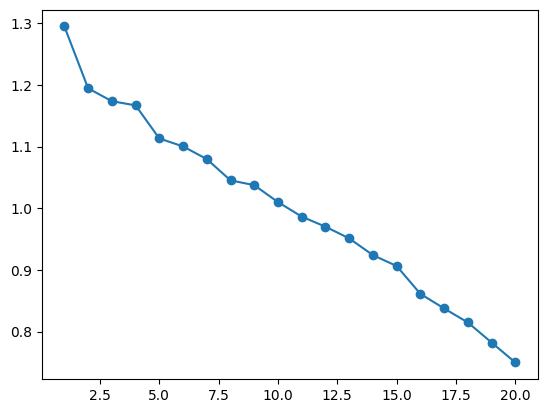

In [308]:
fa = FactorAnalyzer(n_factors= 5, rotation = None)
fa.fit(df2)

ev, v = fa.get_eigenvalues()
plt.scatter(range(1, df2.shape[1] + 1), ev)
plt.plot(range(1, df2.shape[1] + 1), ev)
print("eigen value Í∞Ä 1Ïù¥ ÎêòÎäî ÏßÄÏ†êÏù¥ 10Í∞úÏùò ÏöîÏù∏Ïù¥ ÏÑ†ÌÉùÏóê Ï†ÅÌï© Ïà´ÏûêÎ°ú ÌôïÏù∏ÎêúÎã§")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                       0         1         2         3         4         5  \
SS Loading      1.015674  1.009818  1.005966  0.994844  0.991598  0.618637   
Proportion Var  0.050784  0.050491  0.050298  0.049742  0.049580  0.030932   
Cumulative Var  0.050784  0.101275  0.151573  0.201315  0.250895  0.281827   

                       6         7         8         9  
SS Loading      0.343211  0.226891  0.208114  0.166367  
Proportion Var  0.017161  0.011345  0.010406  0.008318  
Cumulative Var  0.298987  0.310332  0.320738  0.329056  

SS Loading (Í≥†Ïú†Í∞í, Eigen Value) : Í∞Å ÏöîÏù∏Ïùò Í≥†Ïú†Í∞íÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Í∞Å ÏöîÏù∏Ïù¥ ÏÑ§Î™ÖÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏöîÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§. 
ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≥†Ïú†Í∞íÏù¥ 1.0Ïù¥ÏÉÅÏù¥Î©¥ Ïú†ÏùòÎØ∏Ìïú ÏöîÏù∏ÏúºÎ°ú Í∞ÑÏ£ºÌïúÎã§. 
1.0 Ïù¥ÏÉÅÏù∏ ÏöîÏù∏1,2,3Ïù¥ Ï£ºÏöî ÏöîÏù∏ÏúºÎ°ú Î≥º Ïàò ÏûàÎã§. 

2. Proportion Varance: Í∞Å ÏöîÏù∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌïòÎäî ÎπÑÏú®ÏùÑ ÎßêÌïòÎ©∞, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 60~70%ÏùÑ ÏÑ§Î™ÖÌïòÎ©¥ Ï¢ãÏùÄ Î™®Îç∏Î°ú ÌåêÎã®ÌïúÎã

<Axes: >

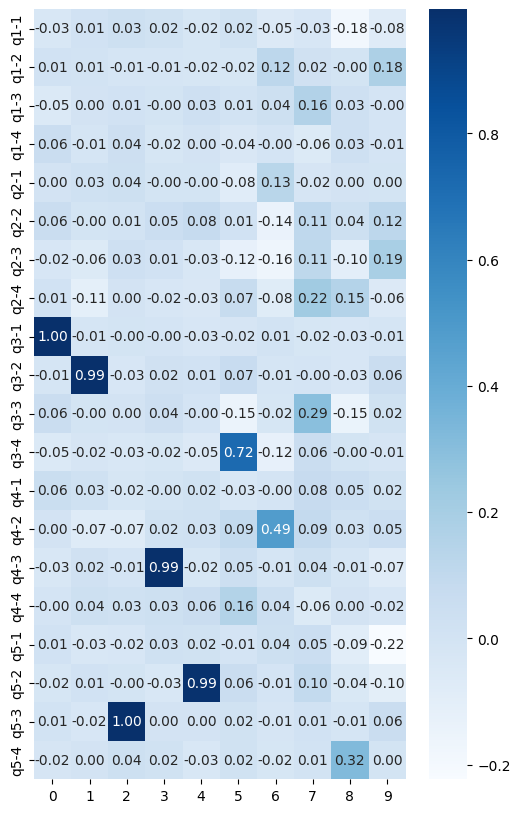

In [312]:
fa = FactorAnalyzer(n_factors = 10, rotation = 'varimax') # ÏµúÎåÄ Ïö∞ÎèÑ Î∞©Î≤ï
fa.fit(df2)

fa_df = pd.DataFrame(fa.get_factor_variance())
fa_df.index =['SS Loading','Proportion Var','Cumulative Var']
print(fa_df)
print("""
SS Loading (Í≥†Ïú†Í∞í, Eigen Value) : Í∞Å ÏöîÏù∏Ïùò Í≥†Ïú†Í∞íÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Í∞Å ÏöîÏù∏Ïù¥ ÏÑ§Î™ÖÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏöîÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≥†Ïú†Í∞íÏù¥ 1.0Ïù¥ÏÉÅÏù¥Î©¥ Ïú†ÏùòÎØ∏Ìïú ÏöîÏù∏ÏúºÎ°ú Í∞ÑÏ£ºÌïúÎã§.
1.0 Ïù¥ÏÉÅÏù∏ ÏöîÏù∏1,2,3Ïù¥ Ï£ºÏöî ÏöîÏù∏ÏúºÎ°ú Î≥º Ïàò ÏûàÎã§.

2. Proportion Varance: Í∞Å ÏöîÏù∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌïòÎäî ÎπÑÏú®ÏùÑ ÎßêÌïòÎ©∞, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 60~70%ÏùÑ ÏÑ§Î™ÖÌïòÎ©¥ Ï¢ãÏùÄ Î™®Îç∏Î°ú ÌåêÎã®ÌïúÎã§.
Í∞Å ÏöîÏù∏ 10Í∞úÎ•º Ìï©Ï≥êÎèÑ 32%Î∞ñÏóê ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Îç∞Ïù¥ÌÑ∞Í∞Ä Ïó¨Îü¨Í∞úÏùò ÏûëÏùÄ ÏöîÏù∏ÏúºÎ°ú ÎÇòÎà†Ï†∏ ÏûàÏñ¥, Ï£ºÏöî ÏöîÏù∏Îßå ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ïñ¥Î†§Ïö∏ ÏàòÏûàÎã§.

3. Culmulative Variance
ÏöîÏù∏ 9Í∞úÍπåÏßÄ Ìè¨Ìï®Ìï¥ÎèÑ 32.9%Î∞ñÏóê ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï® ‚Üí Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞Ïù¥ Ïó¨Îü¨ ÏöîÏù∏Ïóê Í±∏Ï≥ê Î∂ÑÌè¨
""")

result = pd.DataFrame(fa.loadings_,index = df2.columns)
plt.figure(figsize = (6, 10))
sns.heatmap(result, cmap = 'Blues', annot = True , fmt ='.2f')